# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# Loading and Exploring Data

In [3]:
_db = pd.read_csv("diabetes.csv")
_db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
_db.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [5]:
_db['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
_db.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Analysis and Preprocessing

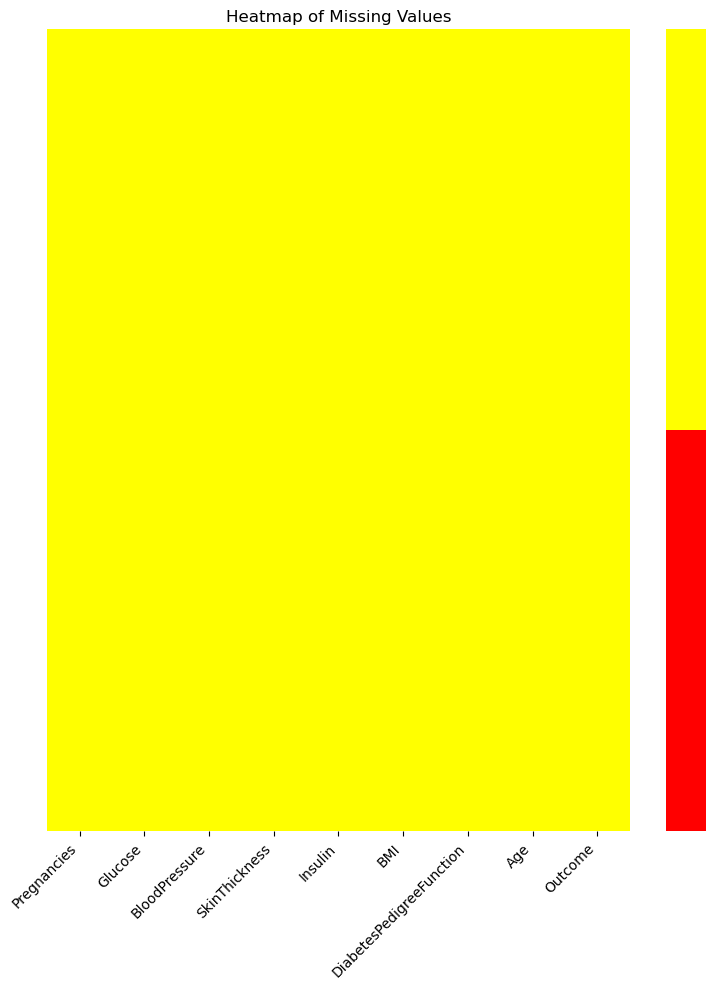

In [7]:
plt.figure(figsize=(8, 10))

heatmap = sns.heatmap(_db.isna(), 
                      cmap=['red', 'yellow'],
                      cbar_kws={'ticks': []},
                      xticklabels=True,
                      yticklabels=False)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('') 

ax = plt.gca()
ax.set_title('Heatmap of Missing Values')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

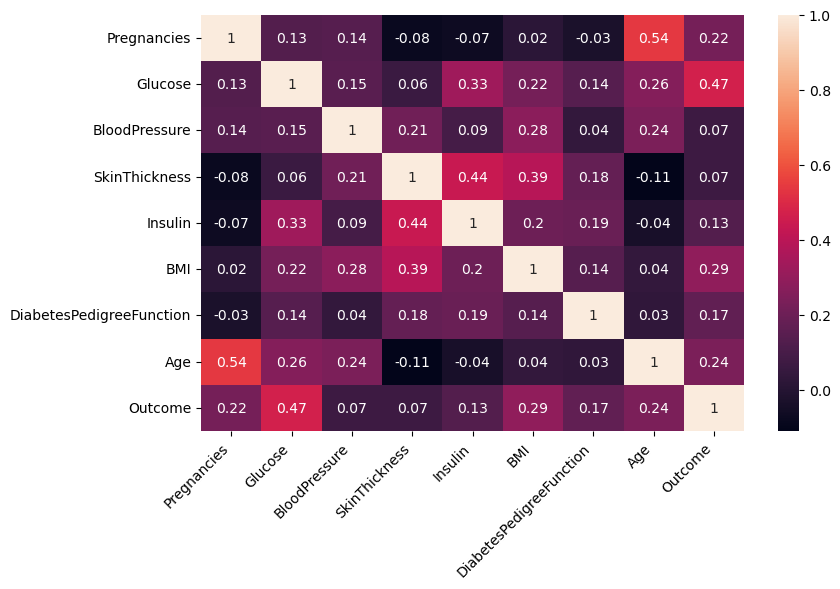

In [8]:
plt.figure(figsize=(9,6))
sns.heatmap(_db.corr().round(2),annot=True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

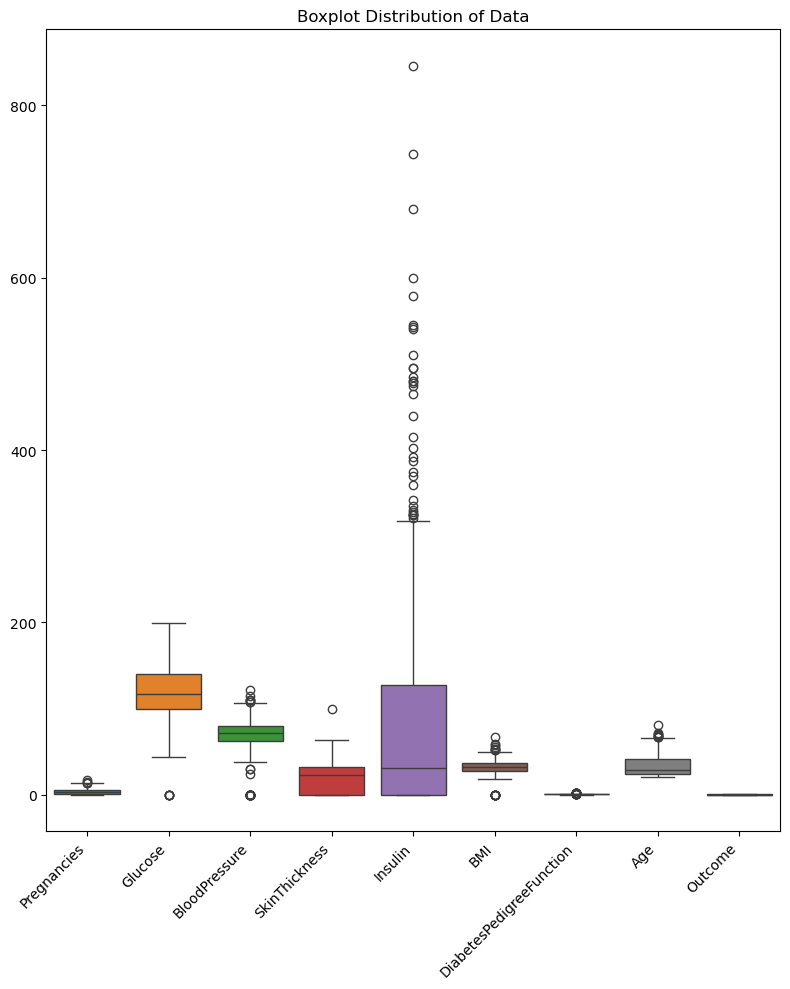

In [9]:
plt.figure(figsize=(8, 10))

boxplot = sns.boxplot(data = _db)

ax = plt.gca()
ax.set_title('Boxplot Distribution of Data')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

In [10]:
X = _db.drop(columns = 'Outcome', axis=1)
y = _db['Outcome']

In [11]:
scalar = StandardScaler()
scalar.fit(X)
X_Standardized = scalar.transform(X)
X = X_Standardized

# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Applying Models

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}

# Evaluating the Models

In [15]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

In [16]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Recall,Precision,F1 Score,Confusion Matrix
Logistic Regression,0.714286,0.714286,0.706464,0.708352,"[[82, 18], [26, 28]]"
k-NN,0.707792,0.707792,0.702271,0.704263,"[[80, 20], [25, 29]]"
SVM,0.746753,0.746753,0.74385,0.745007,"[[82, 18], [21, 33]]"
Naïve Bayes,0.707792,0.707792,0.71788,0.711386,"[[74, 26], [19, 35]]"


In [18]:
r = results_df.drop('Confusion Matrix',axis=1)
r = r.astype("float")
r.index.name="ML"
r

,Accuracy,Recall,Precision,F1 Score
ML,,,,
Logistic Regression,0.714286,0.714286,0.706464,0.708352
k-NN,0.707792,0.707792,0.702271,0.704263
SVM,0.746753,0.746753,0.743850,0.745007
Naïve Bayes,0.707792,0.707792,0.717880,0.711386


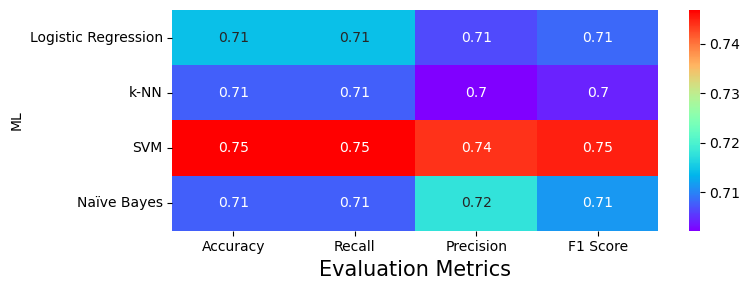

In [23]:
plt.figure(figsize=(8,3))
sns.heatmap(r,annot=True,cmap="rainbow")
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.tight_layout()
plt.show()

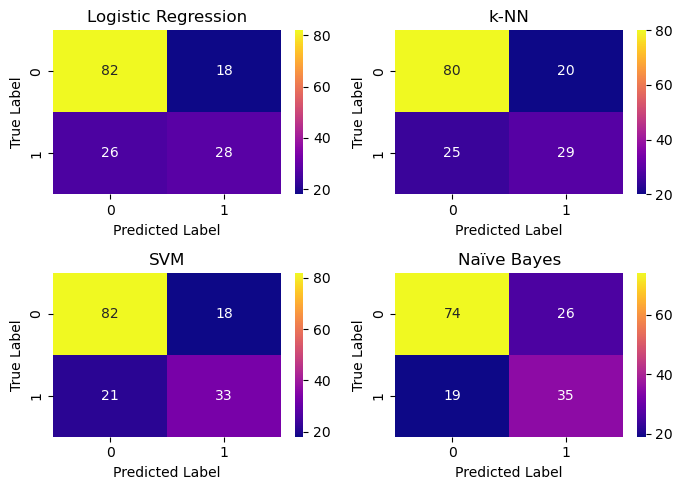

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten() 


for i, (model, cm) in enumerate(results_df['Confusion Matrix'].items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="plasma", ax=axes[i])
    axes[i].set_title(model)  
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()